In [1]:
import os
import pandas as pd

%matplotlib inline
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Step 1 : Initiating the dataset

Since we don't train the model, we only need one dataset

In [2]:
#img_dir="/mnt/c/Users/bejo2361/PycharmProjects/IA-MED_IMG"
os.environ["DEBUG"]="False"
from torch.utils.data import Dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

i=0

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



# Step 2 : Assert the dataloader is working ; Require the images on the device

torch.Size([1, 28, 28])
T-Shirt


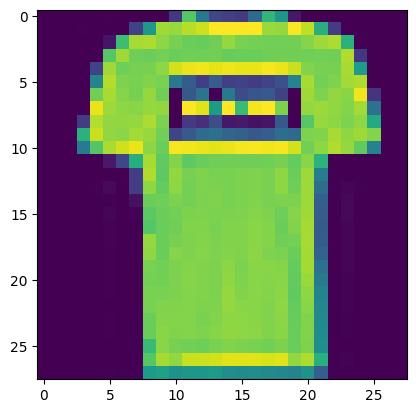

In [9]:
import time

image,label = training_data[i]
print(image.shape)

print(labels_map[label])
plt.imshow(image.squeeze().numpy())

i+=1

# Step 2.2 : We can test the data augmentations !

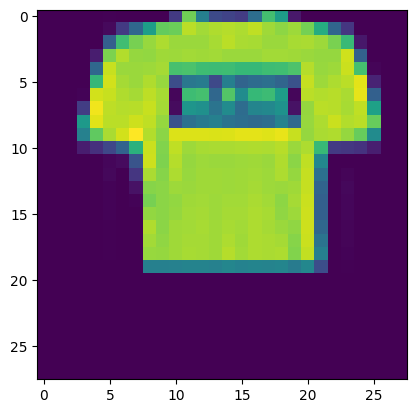

In [12]:
import albumentations as A
import cv2 as cv
#image  = A.augmentations.geometric.transforms.Affine(scale=(0.95,1.05),translate_percent=(0.05,0.05),rotate=(-15,15),shear=None,cval=0,keep_ratio=True,p=1)(image=np.array(frontal_image)[:,:,None])["image"]

# image  = A.augmentations.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, always_apply=False,p=1)(image=np.array(frontal_image)[:,:,None])["image"]

image = A.GridDistortion(num_steps=1,distort_limit=0.3,interpolation=1,border_mode=0,value=None,mask_value=None,always_apply=False,p=1)(image=np.array(image))["image"]

# image = A.ElasticTransform(alpha=0.2, sigma=25, alpha_affine=50, interpolation=1, value=None,p=1, border_mode=cv.BORDER_CONSTANT)(image=np.array(frontal_image)[:,:,None])["image"]

plt.imshow(image[0,:,:,None])
plt.show()


# Step 3 : Let's now plot some information about the dataset

In [ ]:

data = np.concatenate([dataset.count.reshape((1,18)),dataset.count.reshape((1,18))/len(dataset)])
data = pd.DataFrame(data,columns=names,index=["Count","Ratio"])
print(data)


In [ ]:
plt.bar(x=range(0,len(names)),height=dataset.count,label=names)
plt.show()

# Let's now verify the dataloader ; does it extract the classes as we want to?

In [ ]:
import torch
%matplotlib inline
second_image_count=0


labels=torch.zeros((len(names)))

for image,label,idx in dataset :
    if torch.max(image[1])==0 :
        second_image_count+=1

    labels+=label

print("The ratio of images with a second image : ", second_image_count/len(dataset))
plt.bar(x=range(0,len(names)),height=labels,label=names)
plt.show()